## Import Libraries

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Get the Data

In [44]:
titanic= pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv')

## Check the head and tail of the data

In [45]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic.tail()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Getting Information

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


## Understanding the dispersion of data

In [48]:
titanic.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA
### Let's explore the data!

## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

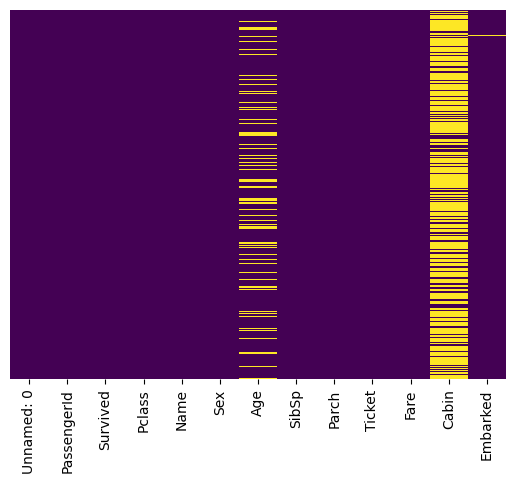

In [49]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

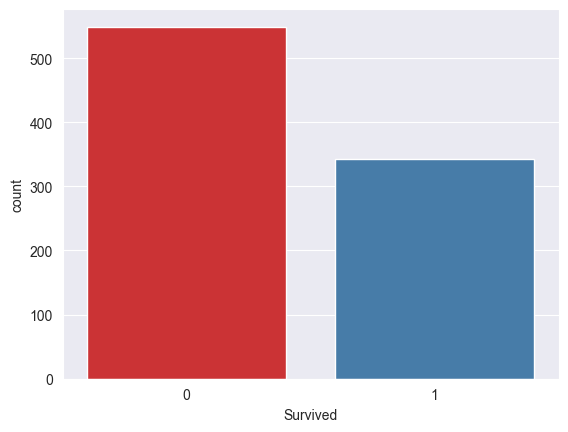

In [50]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=titanic,palette='Set1')

<Axes: xlabel='Survived', ylabel='count'>

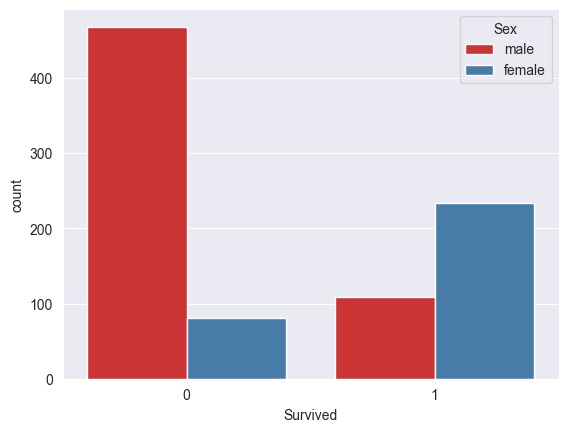

In [51]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='Set1')

<Axes: xlabel='Age'>

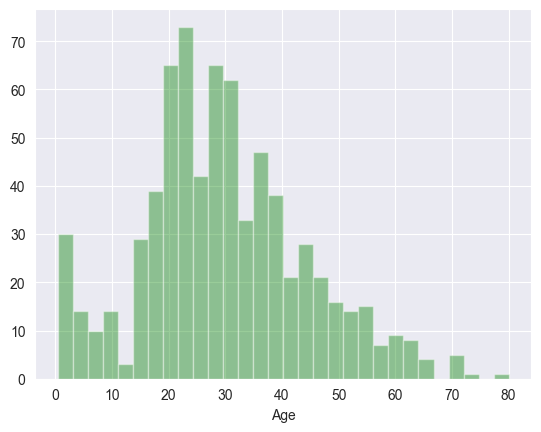

In [52]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='green',bins=30)

<Axes: >

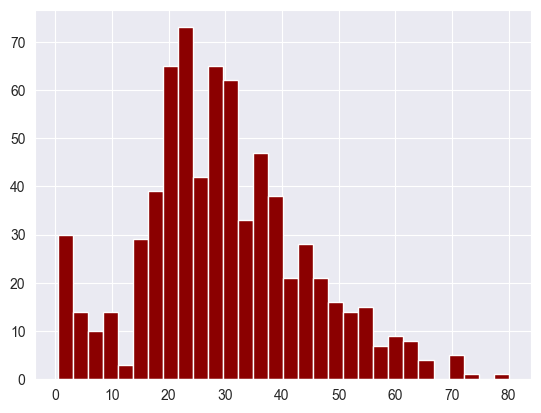

In [53]:

titanic['Age'].hist(bins=30,color='darkred')

<Axes: xlabel='SibSp', ylabel='count'>

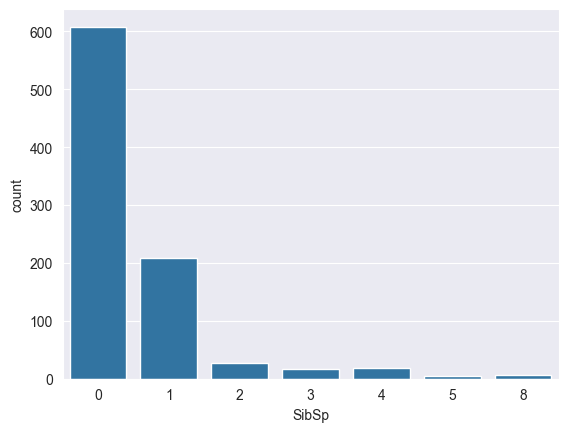

In [54]:
sns.countplot(x='SibSp',data=titanic)

## Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

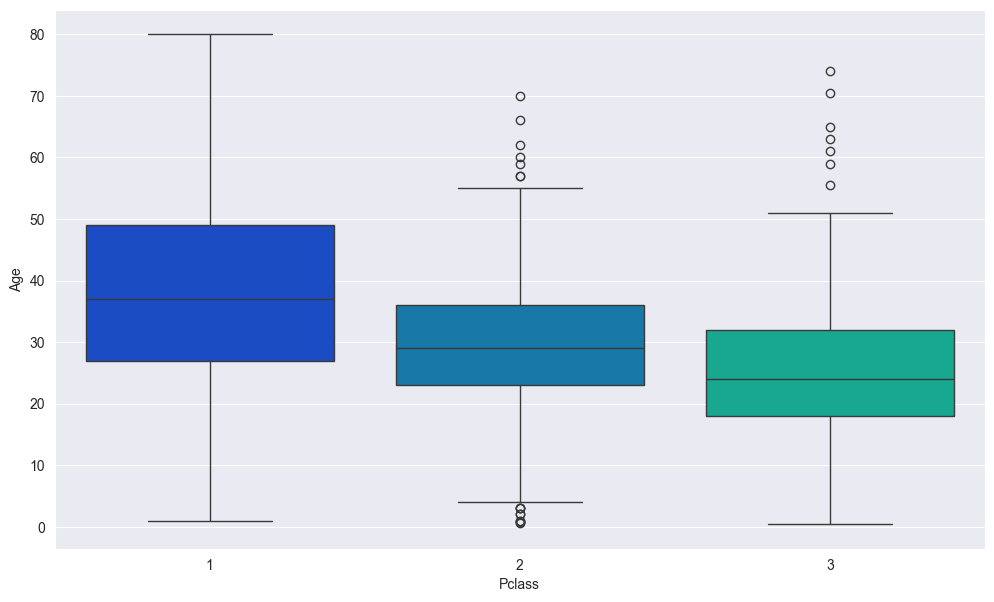

In [55]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [56]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [57]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [58]:
df_features = titanic.drop('Survived',axis = 1)

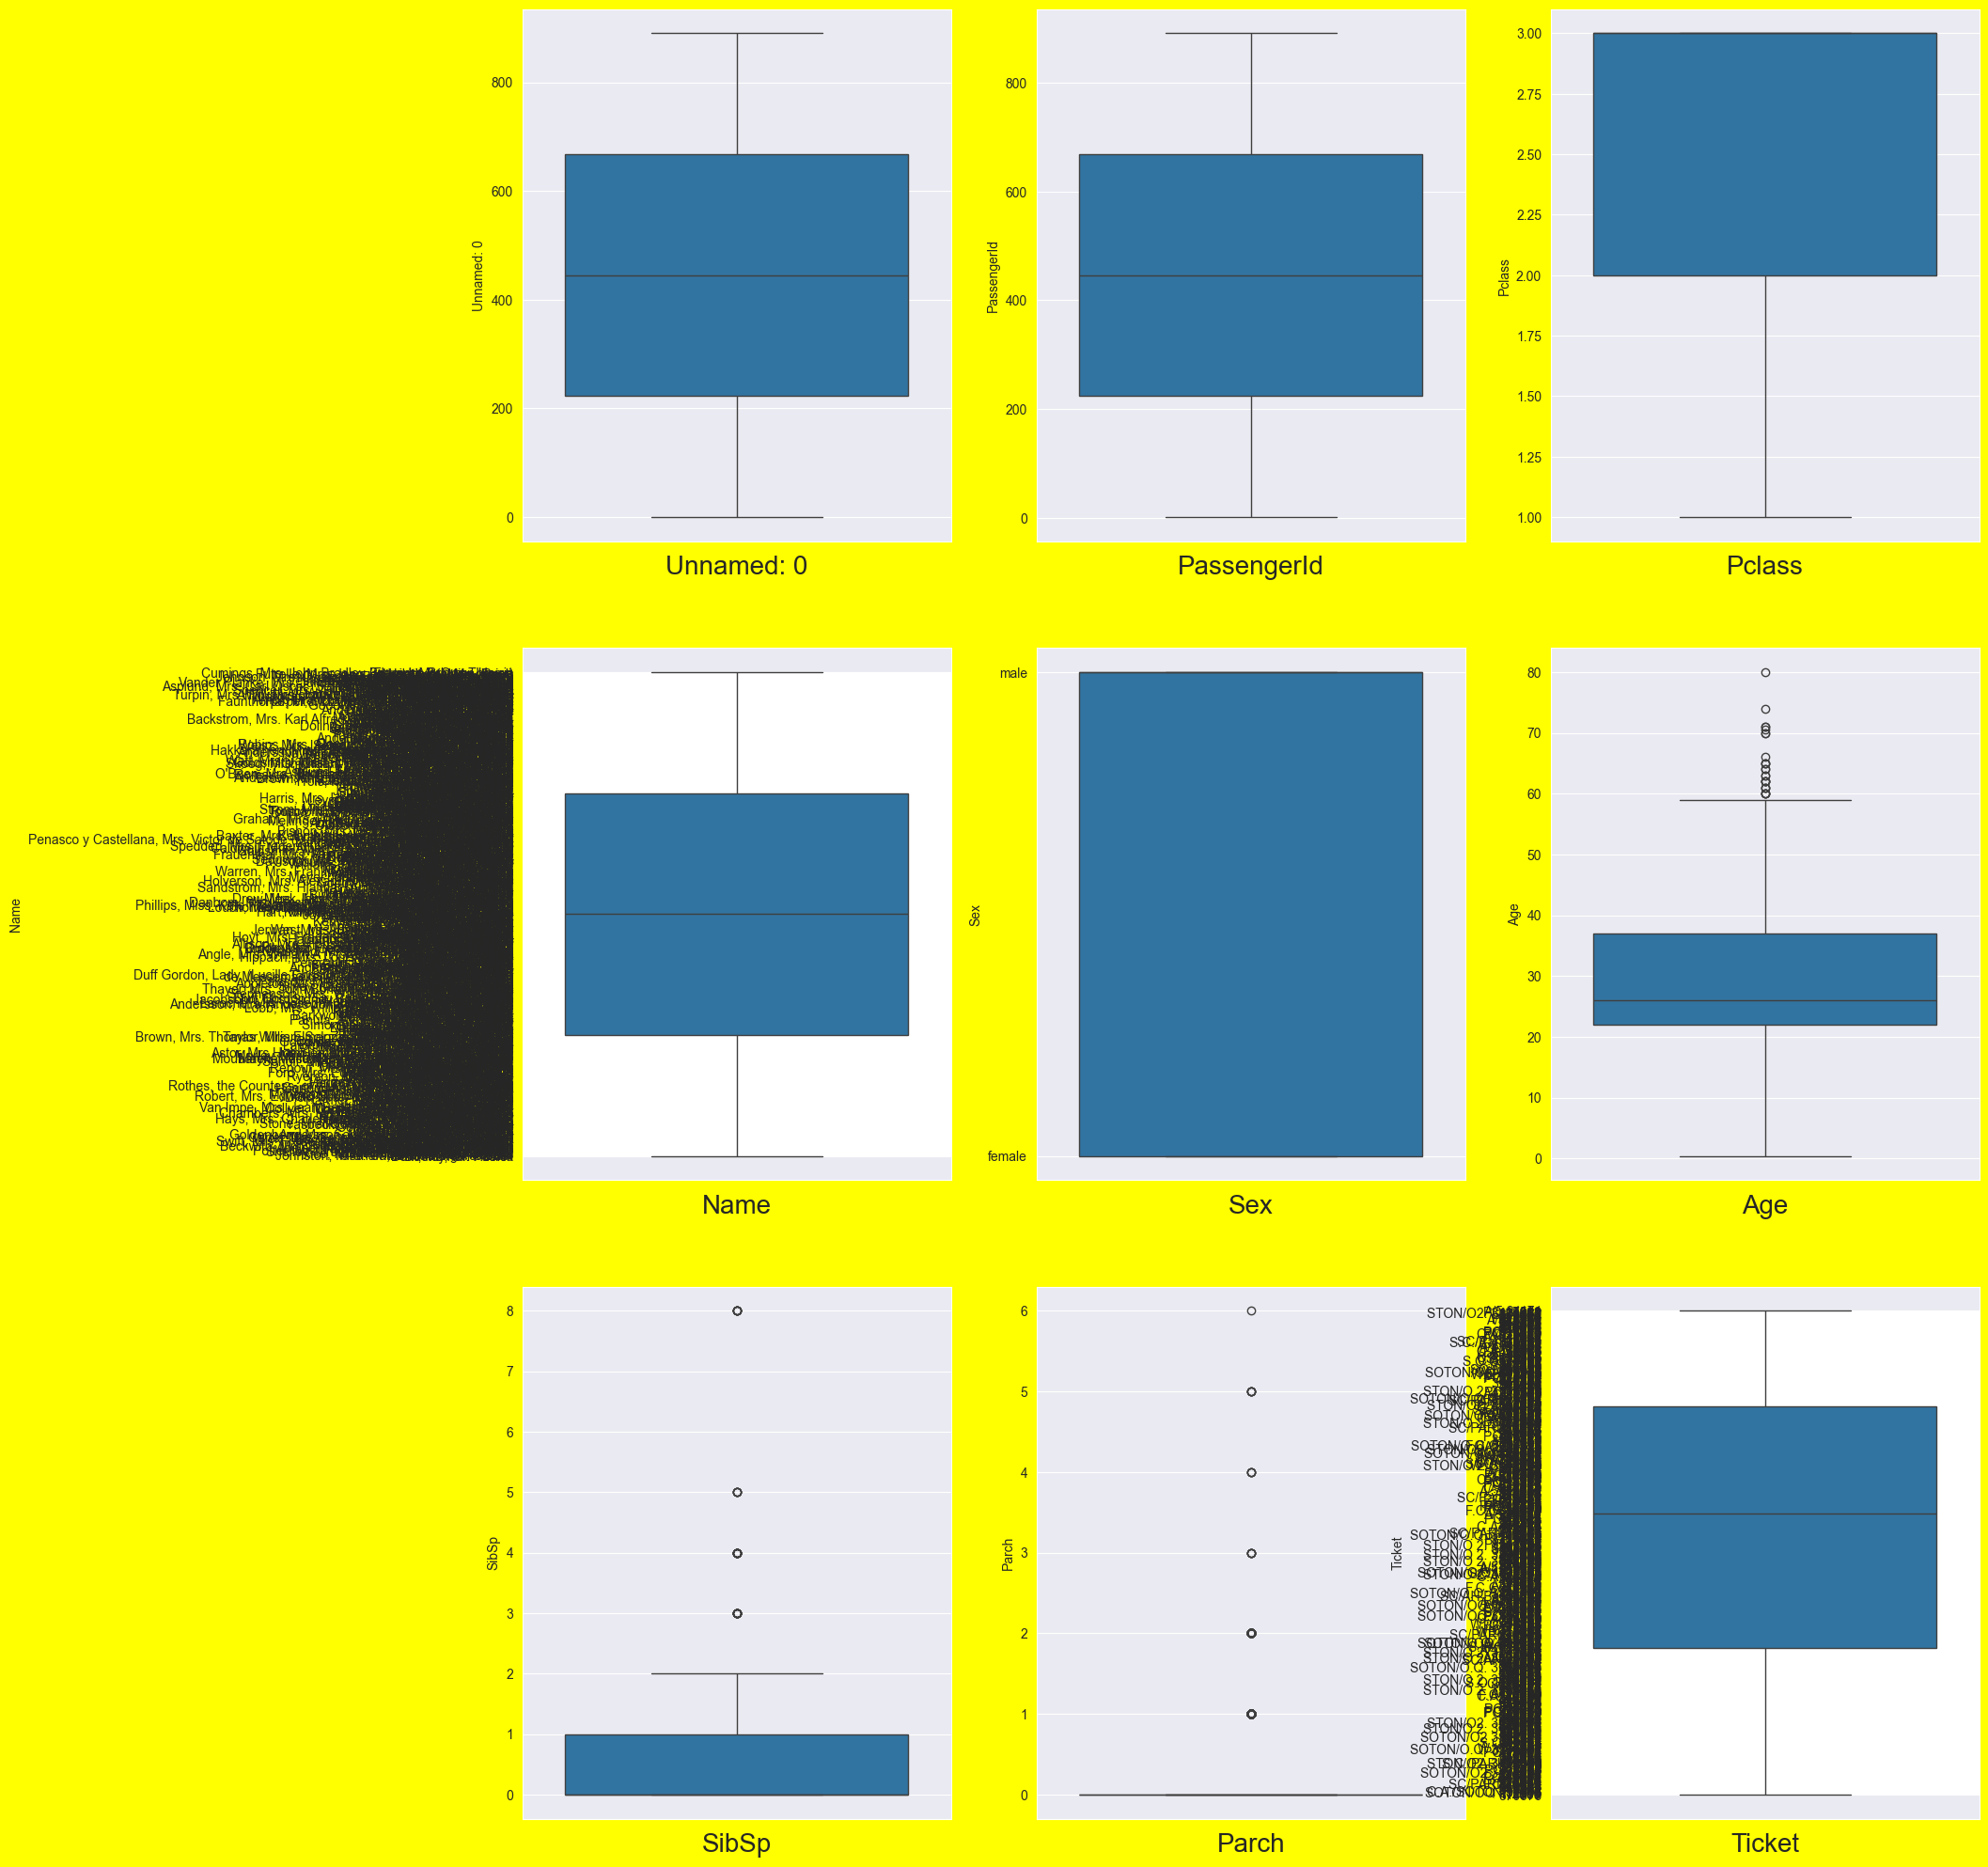

In [59]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df_features:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [16]:
titanic

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,1,0,3,22.0,1,0,7.2500,NaN
1,1,2,1,1,38.0,1,0,71.2833,C85
2,2,3,1,3,26.0,0,0,7.9250,NaN
3,3,4,1,1,35.0,1,0,53.1000,C123
4,4,5,0,3,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,27.0,0,0,13.0000,NaN
887,887,888,1,1,19.0,0,0,30.0000,B42
888,888,889,0,3,24.0,1,2,23.4500,NaN
889,889,890,1,1,26.0,0,0,30.0000,C148


In [19]:
#FIND IQR
q1 = titanic.quantile(0.25)
q3 = titanic.quantile(0.75)

iqr  = q3 - q1

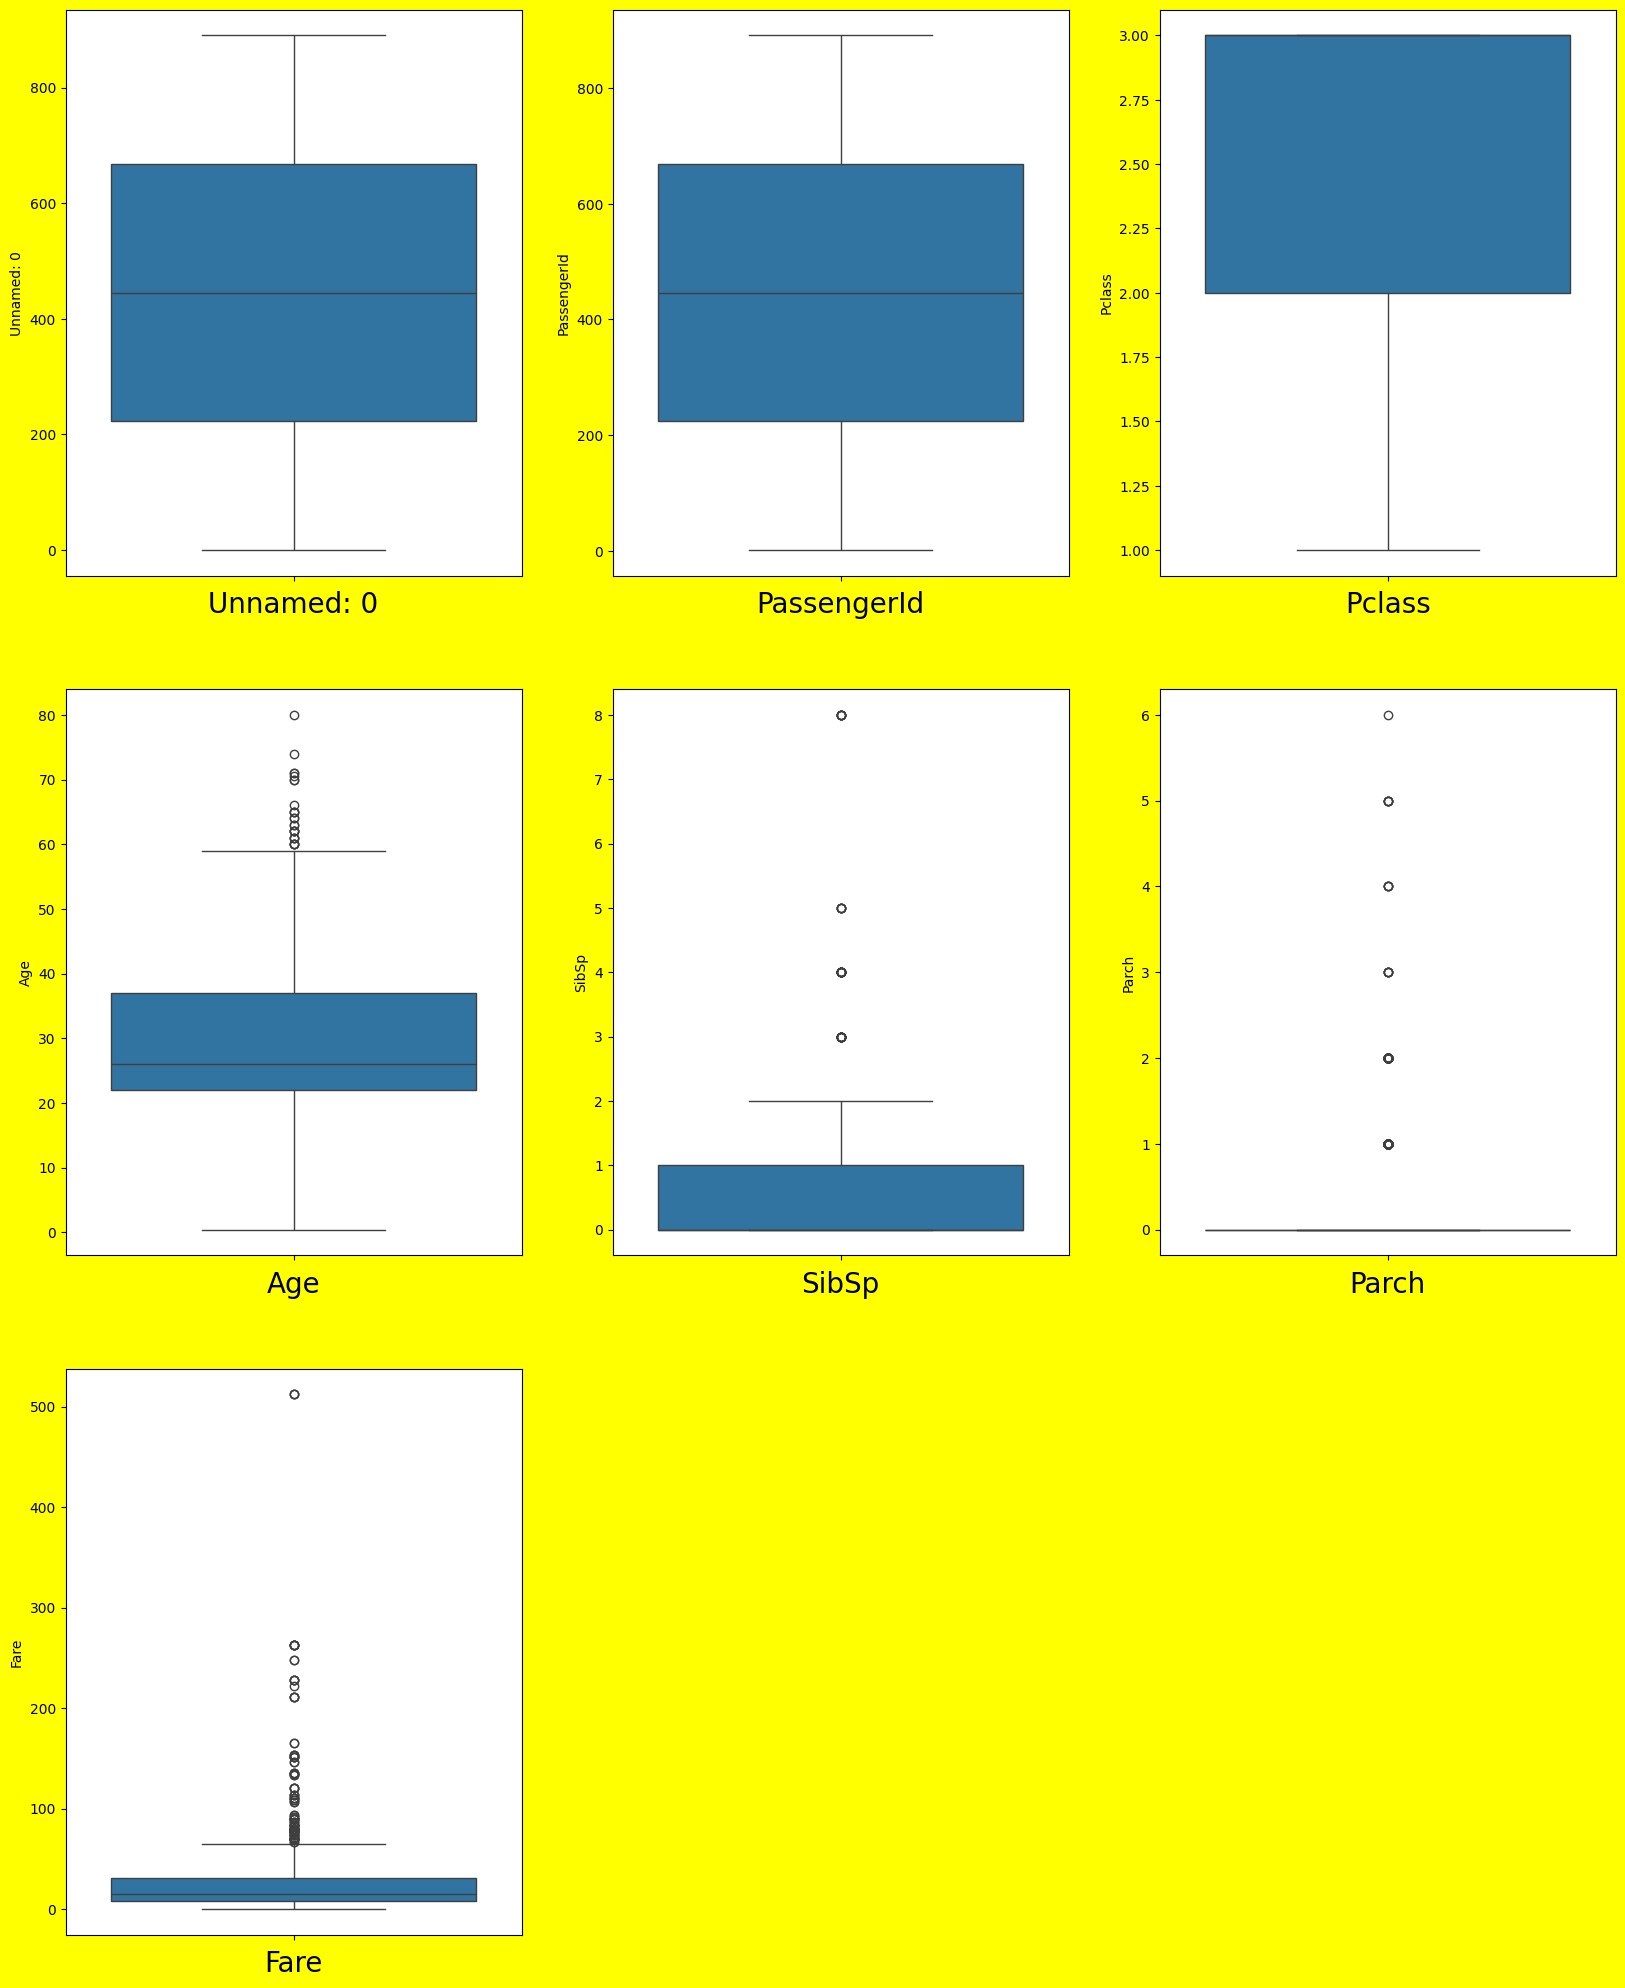

In [23]:
df_feature = train.drop(columns='Survived')
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df_feature:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [33]:
fare_high = (q3.Fare + (1.5 * iqr.Fare))
print(fare_high)

index = np.where(train['Fare'] > fare_high)

data = train.drop(titanic.index[index])
print(titanic.shape)

data.reset_index()

65.6344
(891, 8)


,index,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,3,22.0,1,0,7.2500
1,2,2,3,1,3,26.0,0,0,7.9250
2,3,3,4,1,1,35.0,1,0,53.1000
3,4,4,5,0,3,35.0,0,0,8.0500
4,5,5,6,0,3,24.0,0,0,8.4583
...,...,...,...,...,...,...,...,...,...
770,886,886,887,0,2,27.0,0,0,13.0000
771,887,887,888,1,1,19.0,0,0,30.0000
772,888,888,889,0,3,24.0,1,2,23.4500
773,889,889,890,1,1,26.0,0,0,30.0000


In [34]:
SibSp_high = (q3.SibSp + (1.5 * iqr.SibSp))
print(fare_high)

index = np.where(titanic['SibSp'] > SibSp_high)

data = titanic.drop(titanic.index[index])
print(titanic.shape)

data.reset_index()

65.6344
(891, 8)


,index,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,3,22.0,1,0,7.2500
1,1,1,2,1,1,38.0,1,0,71.2833
2,2,2,3,1,3,26.0,0,0,7.9250
3,3,3,4,1,1,35.0,1,0,53.1000
4,4,4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
840,886,886,887,0,2,27.0,0,0,13.0000
841,887,887,888,1,1,19.0,0,0,30.0000
842,888,888,889,0,3,24.0,1,2,23.4500
843,889,889,890,1,1,26.0,0,0,30.0000


<Axes: >

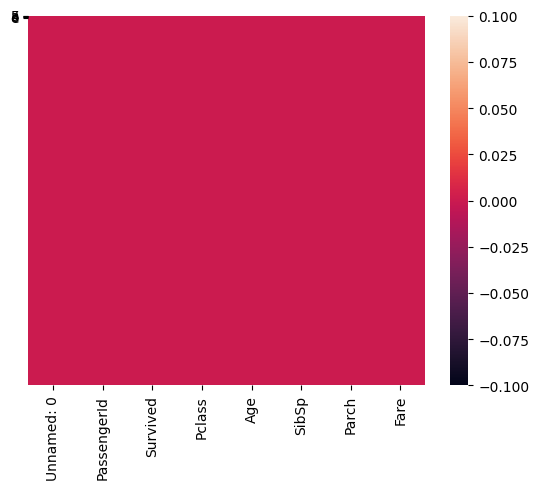

In [35]:
sns.heatmap(titanic.isnull(),yticklabels='False')

In [32]:
age_high = (q3.Age + (1.5 * iqr.Age))
print(age_high)

index = np.where(titanic['Age'] > age_high)

data = titanic.drop(titanic.index[index])
print(titanic.shape)

data.reset_index()

59.5
(891, 8)


,index,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,3,22.0,1,0,7.2500
1,1,1,2,1,1,38.0,1,0,71.2833
2,2,2,3,1,3,26.0,0,0,7.9250
3,3,3,4,1,1,35.0,1,0,53.1000
4,4,4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
860,886,886,887,0,2,27.0,0,0,13.0000
861,887,887,888,1,1,19.0,0,0,30.0000
862,888,888,889,0,3,24.0,1,2,23.4500
863,889,889,890,1,1,26.0,0,0,30.0000


In [60]:
titanic.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
titanic.drop('Cabin',axis=1,inplace=True)

In [62]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
titanic.dropna(inplace=True)

In [64]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
titanic.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

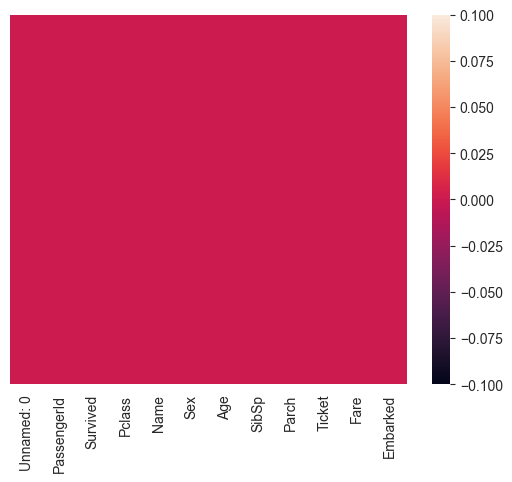

In [66]:
sns.heatmap(titanic.isnull(),yticklabels=False)

## Converting Categorical Features

In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   889 non-null    int64  
 1   PassengerId  889 non-null    int64  
 2   Survived     889 non-null    int64  
 3   Pclass       889 non-null    int64  
 4   Name         889 non-null    object 
 5   Sex          889 non-null    object 
 6   Age          889 non-null    float64
 7   SibSp        889 non-null    int64  
 8   Parch        889 non-null    int64  
 9   Ticket       889 non-null    object 
 10  Fare         889 non-null    float64
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [68]:
pd.get_dummies(titanic['Embarked'], drop_first=True).astype(int).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [70]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [71]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,3,22.0,1,0,7.2500
1,1,2,1,1,38.0,1,0,71.2833
2,2,3,1,3,26.0,0,0,7.9250
3,3,4,1,1,35.0,1,0,53.1000
4,4,5,0,3,35.0,0,0,8.0500


In [72]:
train = pd.concat([titanic,sex,embark],axis=1)

In [73]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,1,0,3,22.0,1,0,7.2500,True,False,True
1,1,2,1,1,38.0,1,0,71.2833,False,False,False
2,2,3,1,3,26.0,0,0,7.9250,False,False,True
3,3,4,1,1,35.0,1,0,53.1000,False,False,True
4,4,5,0,3,35.0,0,0,8.0500,True,False,True


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   889 non-null    int64  
 1   PassengerId  889 non-null    int64  
 2   Survived     889 non-null    int64  
 3   Pclass       889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   male         889 non-null    bool   
 9   Q            889 non-null    bool   
 10  S            889 non-null    bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 65.1 KB


## Building a Logistic Regression model
### Train Test Split

In [40]:
X=train.drop('Survived',axis=1)
X.head()

NameError: name 'train' is not defined

In [33]:
y=train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training and Predicting

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
predictions


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [42]:

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [43]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("=======Train Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_train,y_pred) *100:.2f}%')
    elif train==False:
        pred = clf.predict(x_test)
        print("=======Test Result============")
        print(f'Accuracy Score=> {accuracy_score(y_test,pred) *100:.2f}%')
        print('\n \n Classification Report=>\n',classification_report(y_test,pred,digits=2))

In [44]:
metric_score(logmodel,X_train,X_test,y_train,y_test,train = True)
metric_score(logmodel,X_train,X_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 78.78%
=======Test Result============
Accuracy Score=> 76.40%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       175
           1       0.67      0.63      0.65        92

    accuracy                           0.76       267
   macro avg       0.74      0.73      0.74       267
weighted avg       0.76      0.76      0.76       267



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
accuracy=confusion_matrix(y_test,predictions)

In [47]:
accuracy

array([[146,  29],
       [ 34,  58]], dtype=int64)

## Evaluation Using DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)

In [50]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 100.00%
=======Test Result============
Accuracy Score=> 80.27%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [52]:
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[116,  18],
       [ 26,  63]], dtype=int64)

In [53]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(5,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,15)
}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
gridsearch = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [56]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [57]:
best_parm = gridsearch.best_params_
best_parm

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [58]:
clf = DecisionTreeClassifier( criterion= 'gini',
 max_depth= 5,
 max_leaf_nodes= 6,
 min_samples_leaf= 2,
 min_samples_split= 3)

In [59]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=3)

In [60]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 83.33%
=======Test Result============
Accuracy Score=> 81.61%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       134
           1       0.82      0.70      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



In [61]:
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[120,  14],
       [ 27,  62]], dtype=int64)